# Udacity Data Analyst Project Three: Wrangle and Analyze Twitter Data

<b>By Siwei Liu  <br> <b>Date: June 4th, 2018

In [1]:
# Import python libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import re
import os

# Gather Data

In [2]:
# Gather first file: manually download the 'twitter-archive-enhanced.csv' file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Gather second file: programmatically download the dog image prediction file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

filename = url.split('/')[-1]

with open(filename, mode='wb') as file:
    file.write(response.content)

image_prediction = pd.read_csv(filename, sep='\t')

In [10]:
# Gather third file: query the Twitter API for each tweet's JSON data using Python's Tweepy library
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [12]:
# Use the twitt_id in twitter_archive data frame to quary Twitter API, write the JSON data we get to 'tweet_json.txt'
# with each available tweet's JSON data on its own line.
with open('tweet_json.txt','w') as file:
    for tweet_id in list(twitter_archive.tweet_id):
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended',
                                  wait_on_rate_limit=True,
                                  wait_on_rate_limit_notify=True)
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            print('Error tweet_id:' + str(tweet_id))
            continue
            

Error tweet_id:888202515573088257
Error tweet_id:873697596434513921
Error tweet_id:869988702071779329
Error tweet_id:866816280283807744
Error tweet_id:861769973181624320
Error tweet_id:845459076796616705
Error tweet_id:842892208864923648
Error tweet_id:837012587749474308
Error tweet_id:827228250799742977
Error tweet_id:802247111496568832
Error tweet_id:775096608509886464
Error tweet_id:740676976021798912
Error tweet_id:727175381690781696
Error tweet_id:725729321944506368
Error tweet_id:725458796924002305
Error tweet_id:724004602748780546
Error tweet_id:715009755312439296
Error tweet_id:706901761596989440
Error tweet_id:705066031337840642
Error tweet_id:695314793360662529
Error tweet_id:693155686491000832
Error tweet_id:671874878652489728
Error tweet_id:671542985629241344
Error tweet_id:670823764196741120
Error tweet_id:670780561024270336
Error tweet_id:670764103623966721
Error tweet_id:670704688707301377
Error tweet_id:670668383499735048
Error tweet_id:670303360680108032
Error tweet_id

In [74]:
tweet_info = pd.read_json('tweet_json.txt',lines=True)

# Assess Data

In [75]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [76]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [77]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [78]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [79]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [80]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [81]:
tweet_info.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38793,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8584,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33229,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6308,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25023,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4188,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42156,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8701,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",40330,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9469,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [82]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 2310
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2311 non-null datetime64[ns]
display_text_range               2311 non-null object
entities                         2311 non-null object
extended_entities                2036 non-null object
favorite_count                   2311 non-null int64
favorited                        2311 non-null bool
full_text                        2311 non-null object
geo                              0 non-null float64
id                               2311 non-null int64
id_str                           2311 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [83]:
tweet_info.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2311.000000,0.0,2.311000e+03,2.311000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2173.0,2173.0,2.500000e+01,2.500000e+01,2311.000000
mean,NaN,NaN,8145.894851,NaN,7.431649e+17,7.431649e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.213268e+17,8.213268e+17,3053.578970
std,NaN,NaN,12194.720106,NaN,6.840134e+16,6.840134e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,5.412241e+16,5.412241e+16,5056.990109
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,7.061659e+17,7.061659e+17,0.000000
25%,NaN,NaN,1452.500000,NaN,6.787993e+17,6.787993e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.961237e+17,7.961237e+17,615.000000
50%,NaN,NaN,3593.000000,NaN,7.204151e+17,7.204151e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1437.000000
75%,NaN,NaN,10087.000000,NaN,7.995904e+17,7.995904e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3529.000000
max,NaN,NaN,143348.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,77325.000000


### Quality Issues

#### `twitter_archive ` table

- Missing data in the *name* column
- Some *rating_numerator* and *rating_denominator* values are incorrect
- Some names in the *name* column is incorrect
- Retweets should be removed (remove the entries where retweeted_status has a value)
- *tweet_id* should be strings instead of numbers
- *rating_numerator* should be floats, *rating_denominator* should be integer

#### `image_prediction` table

- The column *tweet_id* should be strings instead of numbers
- Make all the values (dog bread) in p1, p2, p3 columns lowercased for consistency

#### `tweet_info` table

- Entries with a *retweeted_status* should be excluded
- Rename the column *id* to *tweet_id* in consistency with the other tables and reset the data type in that column
- Exclude all columns that are not needed

### Tidiness Issues

#### ` twitter_archive` table

- Combine the four dog stage columns into one column (called *stage*), then drop the four columns
- *timestamp* data type should be datetime, should also split it into *date* and *time*

#### `image_prediction` table

- Join the data frame to the `twitter_archive` data frame

#### `tweet_info` table

- Join the data frame to the `twitter_archive` data frame

### Some other issues:

- Afrer all the above data cleaning, keep only columns needed in the final merged data frame

# Clean Data

In [163]:
# Make a copy of the data frames
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_info_clean = tweet_info.copy()

#### `twitter_archive` table: some *rating_numerator* and *rating_denominator* values are incorrect

#### Define

Recapture the *rating_numerator* and *rating_denominator* values using Regular Expression

#### Code

In [164]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/\d+', expand=True)

In [165]:
twitter_archive_clean.rating_denominator = twitter_archive_clean.text.str.extract('(?:\d+\.)?\d+\/(\d+)', expand=True)

#### Test

In [166]:
twitter_archive_clean[twitter_archive_clean.tweet_id == 786709082849828864]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None


In [167]:
twitter_archive_clean.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1136,728387165835677696,NaN,NaN,2016-05-06 00:53:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Enchilada (yes, that's her real name)....",NaN,NaN,NaN,https://twitter.com/dog_rates/status/728387165...,12,10,Enchilada,None,None,None,None
1581,687124485711986689,NaN,NaN,2016-01-13 04:10:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Samson. He's a Firecracker Häagen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687124485...,11,10,Samson,None,None,None,None
1421,698195409219559425,NaN,NaN,2016-02-12 17:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Beau &amp; Wilbur. Wilbur stole Beau's be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
1868,675166823650848770,NaN,NaN,2015-12-11 04:14:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arnold. He broke his leg saving a hand...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675166823...,10,10,Arnold,None,None,None,None
780,775733305207554048,NaN,NaN,2016-09-13 16:30:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Anakin. He strives to reach his full d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775733305...,11,10,Anakin,doggo,None,None,None
1381,700890391244103680,NaN,NaN,2016-02-20 03:51:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's dapper af. His owners want ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700890391...,11,10,Chet,None,None,None,None
1137,728046963732717569,NaN,NaN,2016-05-05 02:21:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He controls fountains with hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728046963...,11,10,Raymond,None,None,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
195,855138241867124737,NaN,NaN,2017-04-20 19:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @frasercampbell_: oh my... what's that... b...,8.551225e+17,7.475543e+17,2017-04-20 18:14:33 +0000,https://twitter.com/frasercampbell_/status/855...,14,10,None,None,None,None,None
1673,682303737705140231,NaN,NaN,2015-12-30 20:54:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Todo. He's screaming because he doesn'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682303737...,9,10,Todo,None,None,None,None


#### `twitter_archive` table: Some names in the *name* column is incorrect

#### Define

Replace all the incorrect names in the *name* column with 'None'. (The reason for using 'None' instead of NaN is for consistency reasons).

#### Code

In [168]:
twitter_archive_clean[twitter_archive_clean.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [169]:
lowername_list = ['such','a','quite','not','one','incredibly','mad','an','very','just','my','his','actually','getting',
                 'the','light','this','unacceptable','by','officially','space']
for name in lowername_list:
    twitter_archive_clean.name.replace(name,'None',inplace=True)

#### Test

In [170]:
# Make sure that no lowercase name in the *name* column
twitter_archive_clean[twitter_archive_clean.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1138,728035342121635841,NaN,NaN,2016-05-05 01:35:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is all I want in my life. 12/10 for super...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728035342...,12,10,all,None,None,pupper,None
1206,715758151270801409,NaN,NaN,2016-04-01 04:30:16 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is old now but it's absolutely heckin fan...,NaN,NaN,NaN,https://vine.co/v/hYdLVKDpAFu,13,10,old,None,None,None,None
1259,710272297844797440,NaN,NaN,2016-03-17 01:11:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710272297...,11,10,infuriating,None,None,None,None
1916,674307341513269249,NaN,NaN,2015-12-08 19:19:32 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is life-changing. 12/10 https://t.co/SroT...,NaN,NaN,NaN,https://vine.co/v/i7nWzrenw5h,12,10,life,None,None,None,None


#### Entries with a *retweeted_status_id* and *retweeted_status* in the `twitter_archive` and `tweet_info` tables respectively should be excluded

#### Define

Include only entries with NaN values in the retweeted_status columns in `twitter_archive` table and `tweet_info` table.

#### Code

In [171]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

In [172]:
tweet_info_clean = tweet_info_clean[tweet_info.retweeted_status.isnull()]

#### Test

In [173]:
# Make sure that entries with not NaN values in the retweeted_status_id column are not in the data frame anymore
twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [174]:
# Make sure that entries with not NaN values in the retweeted_status column are not in the data frame anymore
tweet_info_clean[tweet_info_clean.retweeted_status.notnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user


In [175]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 2310
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2141 non-null datetime64[ns]
display_text_range               2141 non-null object
entities                         2141 non-null object
extended_entities                1961 non-null object
favorite_count                   2141 non-null int64
favorited                        2141 non-null bool
full_text                        2141 non-null object
geo                              0 non-null float64
id                               2141 non-null int64
id_str                           2141 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

#### `twitter_archive` table: *tweet_id* should be strings instead of numbers

#### Define

Set the *tweet_id* datatype to string

#### Code

In [176]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

#### Test

In [177]:
# Make sure the data type of the *tweet_id* column is 'object' instead of 'int'
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null object
rating_denominator            2175 non-null object
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), object(13)
memo

#### `twitter_archive` table: *rating_numerator* should be floats, *rating_denominator* should be integer

#### Define

Set the *rating_numerator* datatype to floats, and set the *rating_denominator* datatype to integer

#### Code

In [178]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)

In [179]:
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype(int)

#### Test

In [180]:
# Make sure that *rating_numerator* datatype is float and *rating_denominator* datatype is integer
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(5), int64(1), objec

In [181]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1158,724049859469295616,NaN,NaN,2016-04-24 01:38:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreggory. He just took a look at his s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724049859...,10.0,10,Kreggory,None,None,None,None
1894,674743008475090944,NaN,NaN,2015-12-10 00:10:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just saw a spider. 10/10 d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674743008...,10.0,10,Sophie,None,None,None,None
253,844704788403113984,NaN,NaN,2017-03-23 00:18:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. It's her first time outside and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844704788...,13.0,10,Luna,None,None,None,None
673,789628658055020548,NaN,NaN,2016-10-22 00:45:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eli. He can fly. 13/10 magical af http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789628658...,13.0,10,Eli,None,None,None,None
389,826476773533745153,NaN,NaN,2017-01-31 17:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pilot. He has mastered the synchronize...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826476773...,12.0,10,Pilot,doggo,None,None,None


#### `image_prediction` table: the column *tweet_id* should be strings instead of numbers

#### Define

Set the data type of *tweet_id* in `image_prediction` table to be string.

#### Code

In [182]:
image_prediction_clean.tweet_id = image_prediction_clean.tweet_id.astype(str)

#### Test

In [183]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### `image_prediction` table: make all the values (dog bread) in p1, p2, p3 columns lowercased for consistency

#### Define

Use .lower() to make all the values in p1, p2 and p3 columns lowercased.

#### Code

In [184]:
image_prediction_clean.p1 = image_prediction_clean.p1.str.lower()
image_prediction_clean.p2 = image_prediction_clean.p2.str.lower()
image_prediction_clean.p3 = image_prediction_clean.p3.str.lower()

#### Test

In [185]:
image_prediction[~image_prediction_clean.p1.str.islower()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [186]:
image_prediction[~image_prediction_clean.p2.str.islower()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [187]:
image_prediction[~image_prediction_clean.p3.str.islower()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### `tweet_info` table: Rename the column *id* to *tweet_id* in consistency with the other tables and reset the data type in that column

#### Define

Change the column name from *id* to *tweet_id* using .rename()

#### Code

In [188]:
tweet_info_clean.rename(columns={'id':'tweet_id'},inplace=True)

In [189]:
tweet_info_clean.tweet_id = tweet_info_clean.tweet_id.astype(str)

#### Test

In [190]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 2310
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2141 non-null datetime64[ns]
display_text_range               2141 non-null object
entities                         2141 non-null object
extended_entities                1961 non-null object
favorite_count                   2141 non-null int64
favorited                        2141 non-null bool
full_text                        2141 non-null object
geo                              0 non-null float64
tweet_id                         2141 non-null object
id_str                           2141 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 

#### `tweet_info` table: exclude all columns that are not needed

#### Define

Keep only the columns that I need: 'tweet_id','retweet_count','favorite_count'

#### Code

In [191]:
tweet_info_clean = tweet_info_clean[['tweet_id','retweet_count','favorite_count']]

#### Test

In [192]:
tweet_info_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8584,38793
1,892177421306343426,6308,33229
2,891815181378084864,4188,25023
3,891689557279858688,8701,42156
4,891327558926688256,9469,40330


In [193]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 2310
Data columns (total 3 columns):
tweet_id          2141 non-null object
retweet_count     2141 non-null int64
favorite_count    2141 non-null int64
dtypes: int64(2), object(1)
memory usage: 66.9+ KB


#### `twitter_archive`table: combine the four dog stage columns into one column (called *stage*), drop the four columns after combining, then replace 'None' in 'stage' with NaN

#### Define

Combine the four columns 'doggo','floofer','pupper','puppo' into one column: 'stage', drop the four columns after combining

#### Code

In [194]:
twitter_archive_clean['stage'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']

twitter_archive_clean['stage'].replace('NoneNoneNoneNone',np.NaN,inplace=True)
twitter_archive_clean['stage'].replace('doggoNoneNoneNone','doggo',inplace=True)
twitter_archive_clean['stage'].replace('NoneflooferNoneNone','floofer',inplace=True)
twitter_archive_clean['stage'].replace('NoneNonepupperNone','pupper',inplace=True)
twitter_archive_clean['stage'].replace('NoneNoneNonepuppo','puppo',inplace=True)

In [195]:
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

#### Test

In [196]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo


#### Join the `image_prediction` and `tweet_info` data frames to the `twitter_archive` data frame

#### Define

Inner join the `image_prediction` and `tweet_info` data frames to the `twitter_archive` data frame using the merge function.

#### Code

In [197]:
twitter_archive_master = pd.merge(twitter_archive_clean, tweet_info_clean, on='tweet_id', how='inner')

In [198]:
twitter_archive_master = pd.merge(twitter_archive_master, image_prediction_clean, on='tweet_id', how='inner')

#### Test

In [199]:
twitter_archive_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,1,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,2,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,1,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,1,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True


In [200]:
twitter_archive_master_clean = twitter_archive_master.copy()

In [201]:
twitter_archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1960
Data columns (total 27 columns):
tweet_id                      1961 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1961 non-null object
source                        1961 non-null object
text                          1961 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1961 non-null object
rating_numerator              1961 non-null float64
rating_denominator            1961 non-null int64
name                          1961 non-null object
stage                         304 non-null object
retweet_count                 1961 non-null int64
favorite_count                1961 non-null int64
jpg_url                       1961 non-null object
img_num                       1961 non

#### Keep only the columns that are needed

#### Define

Keep the columns that are needed in the final data frame

#### Code

In [202]:
twitter_archive_master_clean = twitter_archive_master_clean.drop(['in_reply_to_status_id','in_reply_to_user_id',
                                                                 'retweeted_status_id','retweeted_status_user_id',
                                                                 'retweeted_status_timestamp',
                                                                 'img_num','source'],axis=1)

#### Test

In [203]:
twitter_archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1960
Data columns (total 20 columns):
tweet_id              1961 non-null object
timestamp             1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1961 non-null float64
rating_denominator    1961 non-null int64
name                  1961 non-null object
stage                 304 non-null object
retweet_count         1961 non-null int64
favorite_count        1961 non-null int64
jpg_url               1961 non-null object
p1                    1961 non-null object
p1_conf               1961 non-null float64
p1_dog                1961 non-null bool
p2                    1961 non-null object
p2_conf               1961 non-null float64
p2_dog                1961 non-null bool
p3                    1961 non-null object
p3_conf               1961 non-null float64
p3_dog                1961 non-null bool
dtypes: bool(3), float64(4), int64(3), 

In [204]:
# Inspect on rating_numerator, see if there are some abnormal values and if the abnormal values are accurate
twitter_archive_master_clean.rating_numerator.value_counts()

12.00      444
10.00      408
11.00      389
13.00      261
9.00       148
8.00        94
7.00        50
14.00       35
5.00        31
6.00        31
3.00        18
4.00        16
2.00         9
1.00         5
0.00         2
24.00        1
9.75         1
84.00        1
13.50        1
143.00       1
420.00       1
50.00        1
80.00        1
45.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
165.00       1
11.27        1
1776.00      1
99.00        1
121.00       1
204.00       1
Name: rating_numerator, dtype: int64

In [205]:
# Since there are so many unexpected values, I wanted to see if their denominators are all ten
twitter_archive_master_clean[twitter_archive_master_clean.rating_denominator != 10][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
323,84.0,70
385,24.0,7
662,165.0,150
799,9.0,11
847,204.0,170
887,4.0,20
921,50.0,50
941,99.0,90
965,80.0,80
983,45.0,50


#### Define

For these 18 entries, turn all the *rating_denominator* to 10, and turn the *rating_numerator* to a numer with a scale of 10 instead of the original scale.

#### Code

In [206]:
twitter_archive_master_clean.loc[323,'rating_numerator'] = 84.0 * 10 / 70
twitter_archive_master_clean.loc[385,'rating_numerator'] = 24.0 * 10 / 7
twitter_archive_master_clean.loc[662,'rating_numerator'] = 165.0 * 10 / 150
twitter_archive_master_clean.loc[799,'rating_numerator'] = 9.0 * 10 / 11
twitter_archive_master_clean.loc[847,'rating_numerator'] = 204.0 * 10 / 170
twitter_archive_master_clean.loc[887,'rating_numerator'] = 4.0 * 10 / 20
twitter_archive_master_clean.loc[921,'rating_numerator'] = 50.0 * 10 / 50
twitter_archive_master_clean.loc[941,'rating_numerator'] = 99.0 * 10 / 90
twitter_archive_master_clean.loc[965,'rating_numerator'] = 80.0 * 10 / 80
twitter_archive_master_clean.loc[983,'rating_numerator'] = 45.0 * 10 / 50
twitter_archive_master_clean.loc[1047,'rating_numerator'] = 60.0 * 10 / 50
twitter_archive_master_clean.loc[1123,'rating_numerator'] = 44.0 * 10 / 40
twitter_archive_master_clean.loc[1293,'rating_numerator'] = 143.0 * 10 / 130
twitter_archive_master_clean.loc[1294,'rating_numerator'] = 121.0 * 10 / 110
twitter_archive_master_clean.loc[1319,'rating_numerator'] = 7.0 * 10 / 11
twitter_archive_master_clean.loc[1426,'rating_numerator'] = 144.0 * 10 / 120
twitter_archive_master_clean.loc[1485,'rating_numerator'] = 88.0 * 10 / 80
twitter_archive_master_clean.loc[1941,'rating_numerator'] = 1.0 * 10 / 2

In [207]:
for num in twitter_archive_master_clean.rating_denominator:
    twitter_archive_master_clean.rating_denominator = twitter_archive_master_clean['rating_denominator'].replace(num, 10)

#### Test

In [209]:
twitter_archive_master_clean.loc[[323,385,662,799,847,887,921,941,965,983,1047,1123,1293,1294,1319,1426,1485,1941],['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
323,12.000000,10
385,34.285714,10
662,11.000000,10
799,8.181818,10
847,12.000000,10
887,2.000000,10
921,10.000000,10
941,11.000000,10
965,10.000000,10
983,9.000000,10


In [210]:
# Make sure that all the entries' *rating_denominator* column is 10.
twitter_archive_master_clean[twitter_archive_master_clean.rating_denominator != 10]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [211]:
# After the cleaning above, inspect again on rating_numerator, see if there are still some abnormal values and if the abnormal values are accurate
twitter_archive_master_clean.rating_numerator.value_counts()

12.000000      448
10.000000      410
11.000000      395
13.000000      261
9.000000       148
8.000000        94
7.000000        49
14.000000       35
5.000000        32
6.000000        31
3.000000        18
4.000000        15
2.000000        10
1.000000         4
0.000000         2
6.363636         1
13.500000        1
8.181818         1
9.750000         1
11.270000        1
1776.000000      1
11.260000        1
34.285714        1
420.000000       1
Name: rating_numerator, dtype: int64

In [212]:
twitter_archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1960
Data columns (total 20 columns):
tweet_id              1961 non-null object
timestamp             1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1961 non-null float64
rating_denominator    1961 non-null int64
name                  1961 non-null object
stage                 304 non-null object
retweet_count         1961 non-null int64
favorite_count        1961 non-null int64
jpg_url               1961 non-null object
p1                    1961 non-null object
p1_conf               1961 non-null float64
p1_dog                1961 non-null bool
p2                    1961 non-null object
p2_conf               1961 non-null float64
p2_dog                1961 non-null bool
p3                    1961 non-null object
p3_conf               1961 non-null float64
p3_dog                1961 non-null bool
dtypes: bool(3), float64(4), int64(3), 

#### *timestamp* data type should be datetime, should also split it into 'date' and 'time' (in which, 'time' is not needed)

#### Define

Turn timestamp into datetime object, then, make a new column called *date* 

#### Code

In [213]:
import datetime

twitter_archive_master_clean.timestamp = pd.to_datetime(twitter_archive_master_clean.timestamp)

twitter_archive_master_clean['date'] = twitter_archive_master_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))

#### Test

In [214]:
twitter_archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1960
Data columns (total 21 columns):
tweet_id              1961 non-null object
timestamp             1961 non-null datetime64[ns]
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1961 non-null float64
rating_denominator    1961 non-null int64
name                  1961 non-null object
stage                 304 non-null object
retweet_count         1961 non-null int64
favorite_count        1961 non-null int64
jpg_url               1961 non-null object
p1                    1961 non-null object
p1_conf               1961 non-null float64
p1_dog                1961 non-null bool
p2                    1961 non-null object
p2_conf               1961 non-null float64
p2_dog                1961 non-null bool
p3                    1961 non-null object
p3_conf               1961 non-null float64
p3_dog                1961 non-null bool
date                  1961 non-

# Store  Data

In [215]:
twitter_archive_master_clean.to_csv('twitter_archive_master.csv')

# Analyze Data

In [216]:
# Make a copy of the data frame for analysis
twitter_analyze = twitter_archive_master_clean.copy()

### Insight One:

The first thing that I'm interested in this data set is about the rating. What is the mean rating of dogs? What is the highest rating? And who is the dog that got the highest rating? 

In [217]:
twitter_analyze['rating_numerator'].describe()

count    1961.000000
mean       11.680577
std        40.982091
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

From the above table we can see that the mean rating of dogs is 11.73 and  75% of dog ratings are above 12. The highest rating is a bit surprising, it's 1776! That is way bigger than most of the ratings. My curiosity drives me to think who got this rating and what is going on?

In [218]:
twitter_analyze[twitter_analyze.rating_numerator == 1776]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date
726,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,NaN,2709,5508,...,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,07-04-2016


In [219]:
twitter_analyze[twitter_analyze.rating_numerator == 1776].expanded_urls

726    https://twitter.com/dog_rates/status/749981277...
Name: expanded_urls, dtype: object

https://twitter.com/dog_rates/status/749981277374128128

In [220]:
twitter_analyze[twitter_analyze.rating_numerator == 1776].jpg_url

726    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [221]:
twitter_analyze[twitter_analyze.rating_numerator == 1776].name

726    Atticus
Name: name, dtype: object

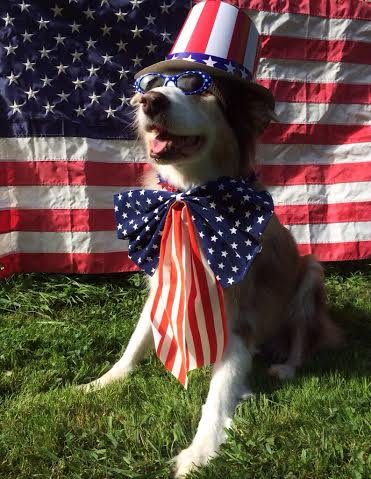

In [222]:
from IPython.display import Image
Image('https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg')

The above simple analysis tells me that it's Atticus who got the 1776 rating! And the picture and text in the data frame suddenly remind me of why Atticus got this rating. American flag and 1776. 1776 was the year that the United States of America emerged as an independent country!

### Insight Two:

Is there a correlation between *retweet_count* and *favorite_count*? Does the tweet that has more retweet have more favorite?

In [223]:
twitter_analyze[['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,1961.000000,1961.000000
mean,2744.468129,8952.871494
std,4718.720887,12629.721343
min,13.000000,80.000000
25%,619.000000,2002.000000
50%,1336.000000,4087.000000
75%,3142.000000,11242.000000
max,77325.000000,143348.000000


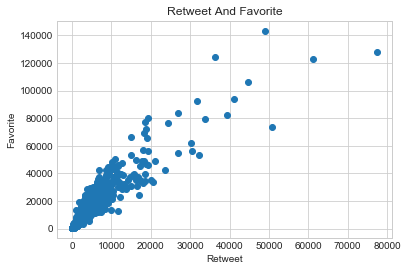

In [224]:
import seaborn as sns

sns.set_style('whitegrid')
plt.scatter(twitter_analyze.retweet_count, twitter_analyze.favorite_count)
plt.xlabel('Retweet')
plt.ylabel('Favorite')
plt.title('Retweet And Favorite')
plt.show()

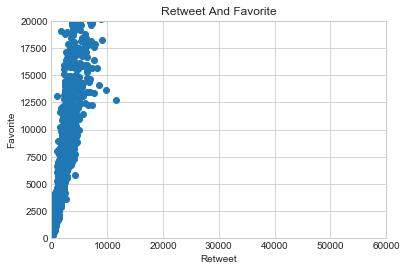

In [225]:
# To zoom in a little
sns.set_style('whitegrid')
plt.scatter(twitter_analyze.retweet_count, twitter_analyze.favorite_count)
plt.xlim(0,60000)
plt.ylim(0,20000)
plt.xlabel('Retweet')
plt.ylabel('Favorite')
plt.title('Retweet And Favorite')
plt.show()

In [226]:
np.corrcoef(twitter_analyze.retweet_count, twitter_analyze.favorite_count)

array([[ 1.        ,  0.91709029],
       [ 0.91709029,  1.        ]])

It seems that there does exist a strong correlation between retweet and favorite, the tweet that has more retweet generously has more favorite.

### Insight Three:

What is the most popular dog name?

In [227]:
twitter_analyze.name.value_counts()

None         636
Charlie       11
Cooper        10
Oliver        10
Lucy          10
Penny          9
Tucker         9
Sadie          8
Toby           7
Daisy          7
Winston        7
Bella          6
Jax            6
Stanley        6
Koda           6
Lola           6
Bo             6
Scout          5
Buddy          5
Leo            5
Louis          5
Oscar          5
Chester        5
Dave           5
Bailey         5
Milo           5
Archie         4
Clarence       4
Gus            4
Bear           4
            ... 
Terrance       1
Tater          1
Chef           1
Arlen          1
Dallas         1
Leela          1
Spanky         1
Nollie         1
Snickers       1
Walker         1
Koko           1
Kathmandu      1
Bertson        1
Charl          1
Buddah         1
Emmie          1
Tyrus          1
Duddles        1
Gidget         1
Gin            1
William        1
Tedders        1
Nimbus         1
Vixen          1
Hanz           1
Chuck          1
Boston         1
Lizzie        

We can see that Charlie seems to be the most popular dog name.